In [1]:
import pandas as pd
import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the SQL database into Pandas
from sqlalchemy import create_engine
user = "postgres"
password = {password}
host = "localhost"
port = 5432
database = "SQL_Homework"
engine = create_engine('postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}'.format(user, password, host, port, database))

In [3]:
connection = engine.connect()

In [4]:
departments = pd.read_sql_query("""SELECT * FROM departments;""", con=engine)
departments

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:
dept_employee = pd.read_sql_query("""SELECT * FROM dept_employee;""", con=engine)
dept_employee.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [6]:
dept_manager = pd.read_sql_query("""SELECT * FROM dept_manager;""", con=engine)
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [7]:
employees = pd.read_sql_query("""SELECT * FROM employees;""", con=engine)
employees = employees.rename(columns={"emp_title_id": "title_id"})
employees

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [9]:
salaries = pd.read_sql_query("""SELECT * FROM salaries;""", con=engine)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [10]:
titles = pd.read_sql_query("""SELECT * FROM titles;""", con=engine)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


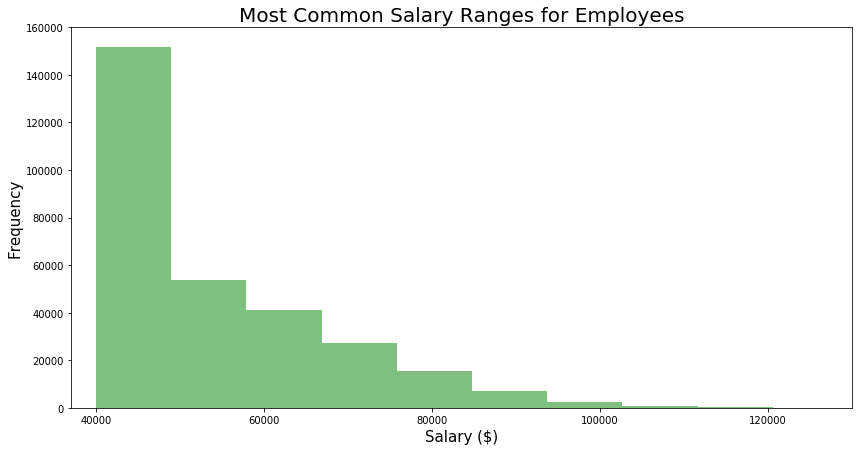

In [11]:
# Create a histogram to visualize the most common salary ranges for employees
plt.figure(figsize=(14, 7))
plt.hist(salaries['salary'], color="green", alpha=0.5)
plt.xlim(37000, 130000)
plt.ylim(0, 160000)
plt.xlabel("Salary ($)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Most Common Salary Ranges for Employees", fontsize=20)
plt.savefig("mostcommon_salaryranges.png")

In [12]:
# Merging dataframes
merged = pd.merge(salaries, employees, on="emp_no")
merged = pd.merge(merged, titles, on="title_id")
merged

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,Manager


In [13]:
# Average salary by title 
avg_salary_df = merged.groupby(merged["title"]).mean()
avg_salary_df = avg_salary_df.reset_index()
avg_salary_df

,title,emp_no,salary
0,Assistant Engineer,252992.595373,48564.434447
1,Engineer,253654.345919,48535.336511
2,Manager,110780.833333,51531.041667
3,Senior Engineer,253038.749885,48506.799871
4,Senior Staff,254481.798969,58550.172704
5,Staff,253408.503604,58465.382850
6,Technique Leader,251811.432730,48582.896092


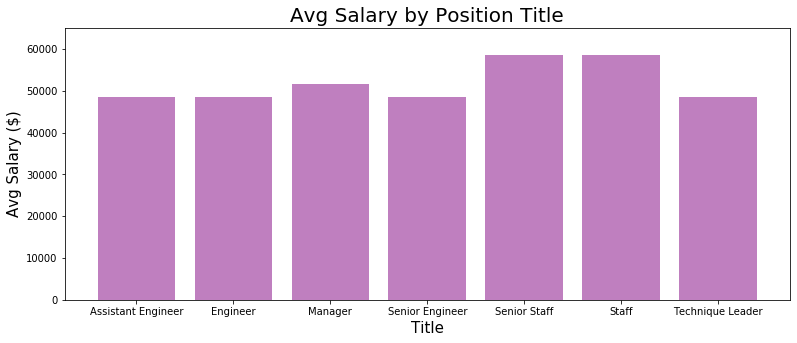

In [14]:
# Create a bar chart of average salary by title
title = avg_salary_df["title"]
avg_salary = avg_salary_df["salary"]
plt.figure(figsize=(13,5))
plt.bar(title,avg_salary, color="purple", alpha=0.5)
plt.ylim(0, 65000)
plt.xlabel("Title", fontsize=15)
plt.ylabel("Avg Salary ($)", fontsize=15)
plt.title("Avg Salary by Position Title", fontsize=20)
plt.savefig("avgsalary_by_title.png")

In [15]:
# Epilogue: Employee ID 499942
my_id = employees.loc[employees["emp_no"] == 499942]
my_id

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
